In [247]:
import requests
import pandas as pd
import geopandas as gpd
import random
from sklearn import preprocessing
from shapely.geometry import Polygon
import dash_leaflet as dl
from dash import Dash
from matplotlib import pyplot as plt
import os

In [2]:
key = 'FsDFoQS21gEmrDViRY9RpJqYtmJ5YizlncdbyKaE'

In [406]:
api_link_2 = 'https://api.eia.gov/v2/seds/data/?api_key='+key+'&frequency=annual&data[0]=value&facets[stateId][]=AK&facets[stateId][]=AL&facets[stateId][]=AR&facets[stateId][]=AZ&facets[stateId][]=CA&facets[stateId][]=CO&facets[stateId][]=CT&facets[stateId][]=DC&facets[stateId][]=DE&facets[stateId][]=FL&facets[stateId][]=GA&facets[stateId][]=HI&facets[stateId][]=IA&facets[stateId][]=ID&facets[stateId][]=IL&facets[stateId][]=IN&facets[stateId][]=KS&facets[stateId][]=KY&facets[stateId][]=LA&facets[stateId][]=MA&facets[stateId][]=MD&facets[stateId][]=ME&facets[stateId][]=MI&facets[stateId][]=MN&facets[stateId][]=MO&facets[stateId][]=MS&facets[stateId][]=MT&facets[stateId][]=NC&facets[stateId][]=ND&facets[stateId][]=NE&facets[stateId][]=NH&facets[stateId][]=NJ&facets[stateId][]=NM&facets[stateId][]=NV&facets[stateId][]=NY&facets[stateId][]=OH&facets[stateId][]=OK&facets[stateId][]=OR&facets[stateId][]=PA&facets[stateId][]=RI&facets[stateId][]=SC&facets[stateId][]=SD&facets[stateId][]=TN&facets[stateId][]=TX&facets[stateId][]=US&facets[stateId][]=UT&facets[stateId][]=VA&facets[stateId][]=VT&facets[stateId][]=WA&facets[stateId][]=WI&facets[stateId][]=WV&facets[stateId][]=WY&facets[stateId][]=X3&facets[stateId][]=X5&facets[seriesId][]=CLEIB&facets[seriesId][]=CLEIK&facets[seriesId][]=DFEIB&facets[seriesId][]=DFTCK&facets[seriesId][]=ELISB&facets[seriesId][]=ELISP&facets[seriesId][]=GEEGP&facets[seriesId][]=HYEGP&facets[seriesId][]=NGEIB&facets[seriesId][]=NGEIK&facets[seriesId][]=NUEGP&facets[seriesId][]=NUETK&facets[seriesId][]=PAEIB&facets[seriesId][]=PAEIK&facets[seriesId][]=SOEGP&facets[seriesId][]=WYEGP&start=2020&end=2021&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000'
#api_link_1 = 'https://api.eia.gov/v2/seds/data/?api_key='+key+'&frequency=annual&data[0]=value&facets[stateId][]=AK&facets[stateId][]=AL&facets[stateId][]=AR&facets[stateId][]=AZ&facets[stateId][]=CA&facets[stateId][]=CO&facets[stateId][]=CT&facets[stateId][]=DC&facets[stateId][]=DE&facets[stateId][]=FL&facets[stateId][]=GA&facets[stateId][]=HI&facets[stateId][]=IA&facets[stateId][]=ID&facets[stateId][]=IL&facets[stateId][]=IN&facets[stateId][]=KS&facets[stateId][]=KY&facets[stateId][]=LA&facets[stateId][]=MA&facets[stateId][]=MD&facets[stateId][]=ME&facets[stateId][]=MI&facets[stateId][]=MN&facets[stateId][]=MO&facets[stateId][]=MS&facets[stateId][]=MT&facets[stateId][]=NC&facets[stateId][]=ND&facets[stateId][]=NE&facets[stateId][]=NH&facets[stateId][]=NJ&facets[stateId][]=NM&facets[stateId][]=NV&facets[stateId][]=NY&facets[stateId][]=OH&facets[stateId][]=OK&facets[stateId][]=OR&facets[stateId][]=PA&facets[stateId][]=RI&facets[stateId][]=SC&facets[stateId][]=SD&facets[stateId][]=TN&facets[stateId][]=TX&facets[stateId][]=US&facets[stateId][]=UT&facets[stateId][]=VA&facets[stateId][]=VT&facets[stateId][]=WA&facets[stateId][]=WI&facets[stateId][]=WV&facets[stateId][]=WY&start=2021&end=2022&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000
r = requests.get(api_link_2)
d = r.json()

In [407]:
#d['response'] #exploring the data, see how we can wrap this in a dataframe

In [408]:
df = pd.DataFrame(d['response']['data'])

In [409]:
pd.DataFrame({'Chosen Data':df.seriesId.unique()}).style

,Chosen Data
0,PAEIB
1,ELISB
2,ELISP
3,NUEGP
4,HYEGP
5,NUETK
6,DFEIB
7,GEEGP
8,WYEGP
9,SOEGP


In [410]:
pd.DataFrame({'Chosen Data':df.seriesDescription.unique()}).style

,Chosen Data
0,All petroleum products consumed by the electric power sector
1,Net interstate flow of electricity and associated losses (negative indicates flow out of state)
2,Net interstate flow of electricity (negative indicates flow out of state)
3,Nuclear electricity net generation in the electric power sector
4,Hydroelectricity net generation in the electric power sector
5,Factor for converting electricity generated from nuclear power from physical units to Btu
6,Distillate fuel oil consumed by the electric power sector
7,Geothermal electricity net generation in the electric power sector
8,Wind electricity net generation in the electric power sector
9,Solar thermal and photovoltaic electricity net generation in the electric power sector


In [8]:
df.head()

,period,seriesId,seriesDescription,stateId,stateDescription,value,unit
0,2021,PAEIB,All petroleum products consumed by the electri...,MI,Michigan,14511.0,Billion Btu
1,2021,PAEIB,All petroleum products consumed by the electri...,LA,Louisiana,43161.0,Billion Btu
2,2021,ELISB,Net interstate flow of electricity and associa...,AZ,Arizona,-198728.0,Billion Btu
3,2021,ELISP,Net interstate flow of electricity (negative i...,OH,Ohio,30782.0,Million kilowatthours
4,2021,ELISP,Net interstate flow of electricity (negative i...,RI,Rhode Island,-1331.0,Million kilowatthours


In [9]:
df.isnull().sum()/df.shape[0] #checking for missing values

period               0.0
seriesId             0.0
seriesDescription    0.0
stateId              0.0
stateDescription     0.0
value                0.0
unit                 0.0
dtype: float64

In [147]:
regions = gpd.read_file('cb_2018_us_state_500k.shp')

In [148]:
regions.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."


In [150]:
census = pd.read_csv('censusregions.csv')

In [151]:
census.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [152]:
census.Region.unique()

array(['West', 'South', 'Northeast', 'Midwest'], dtype=object)

In [155]:
census_region = census.merge(regions, how = 'left', left_on = 'State',right_on = 'NAME')
census_region.drop(columns = 'NAME',inplace=True)

In [156]:
census_region.head()

,State,State Code,Region,Division,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry
0,Alaska,AK,West,Pacific,02,01785533,0400000US02,02,AK,00,1478839695958,245481577452,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ..."
1,Alabama,AL,South,East South Central,01,01779775,0400000US01,01,AL,00,131174048583,4593327154,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
2,Arkansas,AR,South,West South Central,05,00068085,0400000US05,05,AR,00,134768872727,2962859592,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
3,Arizona,AZ,West,Mountain,04,01779777,0400000US04,04,AZ,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
4,California,CA,West,Pacific,06,01779778,0400000US06,06,CA,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


In [157]:
data = df.merge(census_region, how = 'left',left_on = 'stateDescription' ,right_on= 'State')
data.drop(columns = ['stateId', 'stateDescription'], inplace = True)

In [158]:
data.head()

,period,seriesId,seriesDescription,value,unit,State,State Code,Region,Division,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry
0,2021,PAEIB,All petroleum products consumed by the electri...,14511.0,Billion Btu,Michigan,MI,Midwest,East North Central,26,01779789,0400000US26,26,MI,00,1.466010e+11,1.038859e+11,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
1,2021,PAEIB,All petroleum products consumed by the electri...,43161.0,Billion Btu,Louisiana,LA,South,West South Central,22,01629543,0400000US22,22,LA,00,1.118976e+11,2.375362e+10,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
2,2021,ELISB,Net interstate flow of electricity and associa...,-198728.0,Billion Btu,Arizona,AZ,West,Mountain,04,01779777,0400000US04,04,AZ,00,2.941986e+11,1.027338e+09,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,2021,ELISP,Net interstate flow of electricity (negative i...,30782.0,Million kilowatthours,Ohio,OH,Midwest,East North Central,39,01085497,0400000US39,39,OH,00,1.058289e+11,1.026885e+10,"MULTIPOLYGON (((-82.73571 41.60336, -82.73392 ..."
4,2021,ELISP,Net interstate flow of electricity (negative i...,-1331.0,Million kilowatthours,Rhode Island,RI,Northeast,New England,44,01219835,0400000US44,44,RI,00,2.677780e+09,1.323670e+09,"MULTIPOLYGON (((-71.28802 41.64558, -71.28647 ..."


In [159]:
data.State.unique()

array(['Michigan', 'Louisiana', 'Arizona', 'Ohio', 'Rhode Island',
       'District of Columbia', 'Texas', 'New York', 'North Carolina',
       'Oklahoma', 'Missouri', 'Iowa', 'Montana', 'Delaware', 'Alabama',
       'New Jersey', 'South Dakota', 'New Mexico', 'Maryland', 'Kentucky',
       'Florida', 'Mississippi', 'Virginia', 'Kansas', 'Maine', nan,
       'Tennessee', 'New Hampshire', 'Colorado', 'Georgia', 'Arkansas',
       'Hawaii', 'Connecticut', 'Wyoming', 'Minnesota', 'Utah', 'Nevada',
       'Vermont', 'Pennsylvania', 'Massachusetts', 'South Carolina',
       'Indiana', 'North Dakota', 'Alaska', 'Oregon', 'California',
       'Illinois', 'West Virginia', 'Idaho', 'Wisconsin', 'Washington',
       'Nebraska'], dtype=object)

In [160]:
data.dropna(inplace=True)

Now that we've merged our data, let's split up our data by region

Conversion requires us to spit our data into two dataframes (one being hte primary fuel source, the other being the conversion factor), and then multiply the conversion factor by the the fuel source's units

In [161]:
def get_fuel(df,series):
    new_df = df[df.seriesId == series]
    new_df = new_df.sort_values(by = 'State Code').reset_index()
    new_df.drop(columns = 'index', inplace = True)
    return new_df
    
def get_vals(df,val1): #takes df and the names of the series
    amount = get_fuel(df,val1)
    val_in_btu = []
    for i in range(0,len(amount)):
        new_val = amount.value[i] * 10**9
        val_in_btu.append(new_val)
    return val_in_btu

In [162]:
coal_in_btu = get_vals(data, 'CLEIB') #already calculated, need to multiply cleib by 1 bill
gas_in_btu = get_vals(data, 'NGEIB') #need to multiply ngeib by 1 bill
petrol_in_btu = get_vals(data, 'PAEIB') #multiply by 1 bill
distl_in_btu = get_vals(data, 'DFEIB') #multiply by 1 bill

In [398]:
data[data.seriesId == 'NGEIB'].sort_values(by='State Code').head()

,period,seriesId,seriesDescription,value,unit,State,State Code,Region,Division,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry
492,2021,NGEIB,Natural gas consumed by the electric power sec...,25518.0,Billion Btu,Alaska,AK,West,Pacific,02,01785533,0400000US02,02,AK,00,1.478840e+12,2.454816e+11,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ..."
547,2021,NGEIB,Natural gas consumed by the electric power sec...,402384.0,Billion Btu,Alabama,AL,South,East South Central,01,01779775,0400000US01,01,AL,00,1.311740e+11,4.593327e+09,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
556,2021,NGEIB,Natural gas consumed by the electric power sec...,153547.0,Billion Btu,Arkansas,AR,South,West South Central,05,00068085,0400000US05,05,AR,00,1.347689e+11,2.962860e+09,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
522,2021,NGEIB,Natural gas consumed by the electric power sec...,369372.0,Billion Btu,Arizona,AZ,West,Mountain,04,01779777,0400000US04,04,AZ,00,2.941986e+11,1.027338e+09,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
517,2021,NGEIB,Natural gas consumed by the electric power sec...,667481.0,Billion Btu,California,CA,West,Pacific,06,01779778,0400000US06,06,CA,00,4.035039e+11,2.046387e+10,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


In [399]:
data[data.seriesId == 'PAEIB'].head()

,period,seriesId,seriesDescription,value,unit,State,State Code,Region,Division,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry
0,2021,PAEIB,All petroleum products consumed by the electri...,14511.0,Billion Btu,Michigan,MI,Midwest,East North Central,26,01779789,0400000US26,26,MI,00,1.466010e+11,1.038859e+11,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
1,2021,PAEIB,All petroleum products consumed by the electri...,43161.0,Billion Btu,Louisiana,LA,South,West South Central,22,01629543,0400000US22,22,LA,00,1.118976e+11,2.375362e+10,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
588,2021,PAEIB,All petroleum products consumed by the electri...,2065.0,Billion Btu,North Carolina,NC,South,South Atlantic,37,01027616,0400000US37,37,NC,00,1.259237e+11,1.346607e+10,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
589,2021,PAEIB,All petroleum products consumed by the electri...,2782.0,Billion Btu,Missouri,MO,Midwest,West North Central,29,01779791,0400000US29,29,MO,00,1.780508e+11,2.489425e+09,"POLYGON ((-95.77355 40.57820, -95.76853 40.583..."
590,2021,PAEIB,All petroleum products consumed by the electri...,382.0,Billion Btu,Oklahoma,OK,South,West South Central,40,01102857,0400000US40,40,OK,00,1.776629e+11,3.374588e+09,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."


In [165]:
petrol_in_btu[0:5]

[4919000000000.0, 211000000000.0, 549000000000.0, 493000000000.0, 391000000000.0]

In [166]:
len(coal_in_btu)

51

In [167]:
states = census.State.sort_values()

In [400]:
data[data.seriesId == 'WYEGP'].head()

,period,seriesId,seriesDescription,value,unit,State,State Code,Region,Division,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry
169,2021,WYEGP,Wind electricity net generation in the electri...,3473.0,Million kilowatthours,Montana,MT,West,Mountain,30,00767982,0400000US30,30,MT,00,3.769627e+11,3.869209e+09,"POLYGON ((-116.04914 48.50205, -116.04913 48.5..."
194,2021,WYEGP,Wind electricity net generation in the electri...,165.0,Million kilowatthours,Rhode Island,RI,Northeast,New England,44,01219835,0400000US44,44,RI,00,2.677780e+09,1.323670e+09,"MULTIPOLYGON (((-71.28802 41.64558, -71.28647 ..."
205,2021,WYEGP,Wind electricity net generation in the electri...,340.0,Million kilowatthours,Nevada,NV,West,Mountain,32,01779793,0400000US32,32,NV,00,2.843295e+11,2.047206e+09,"POLYGON ((-120.00574 39.22866, -120.00559 39.2..."
206,2021,WYEGP,Wind electricity net generation in the electri...,517.0,Million kilowatthours,Maryland,MD,South,South Atlantic,24,01714934,0400000US24,24,MD,00,2.515110e+10,6.979967e+09,"MULTIPOLYGON (((-76.05015 37.98691, -76.04998 ..."
209,2021,WYEGP,Wind electricity net generation in the electri...,12248.0,Million kilowatthours,Minnesota,MN,Midwest,West North Central,27,00662849,0400000US27,27,MN,00,2.062289e+11,1.894522e+10,"MULTIPOLYGON (((-89.59206 47.96668, -89.59147 ..."


In [169]:
kwh_to_btu = 3412.14 * 10**6
nuclear_in_btu = list(val * kwh_to_btu for val in get_fuel(data,'NUEGP')['value']) 
hydro_in_btu = list(val * kwh_to_btu for val in get_fuel(data,'HYEGP')['value']) 
geothermal_in_btu = list(val * kwh_to_btu for val in get_fuel(data,'GEEGP')['value']) 
solarpv_in_btu = list(val * kwh_to_btu for val in get_fuel(data,'SOEGP')['value'])
wind_in_btu = list(val * kwh_to_btu for val in get_fuel(data,'WYEGP')['value']) 

In [170]:
nuclear_in_btu[0:5]

[0.0, 157081277040000.0, 46254969840000.0, 107925988200000.0, 56221830780000.0]

In [171]:
energy = pd.DataFrame({'State':states, 'Coal': coal_in_btu,'Gas':gas_in_btu,'Petroleum':petrol_in_btu,
                  'Distillate':distl_in_btu,'Nuclear':nuclear_in_btu,'Hydro':hydro_in_btu,'Geothermal':geothermal_in_btu,
                 'Solar':solarpv_in_btu,'Wind':wind_in_btu})

In [172]:
energy.head()

,State,Coal,Gas,Petroleum,Distillate,Nuclear,Hydro,Geothermal,Solar,Wind
1,Alabama,1.130500e+13,2.551800e+13,4.919000e+12,4.919000e+12,0.000000e+00,5.186453e+12,0.000000e+00,0.000000e+00,4.504025e+11
0,Alaska,2.703100e+14,4.023840e+14,2.110000e+11,2.110000e+11,1.570813e+14,3.931126e+13,0.000000e+00,1.685597e+12,0.000000e+00
3,Arizona,2.126760e+14,1.535470e+14,5.490000e+11,5.490000e+11,4.625497e+13,1.374751e+13,0.000000e+00,1.501342e+12,0.000000e+00
2,Arkansas,1.539480e+14,3.693720e+14,4.930000e+11,4.930000e+11,1.079260e+14,2.038071e+13,0.000000e+00,2.283404e+13,5.459424e+12
4,California,0.000000e+00,6.674810e+14,3.910000e+11,3.910000e+11,5.622183e+13,5.005268e+13,3.797029e+13,1.180293e+14,5.174510e+13


In [173]:
energy = energy.merge(census_region, how = 'left',left_on='State',right_on='State')

In [174]:
energy.head()

,State,Coal,Gas,Petroleum,Distillate,Nuclear,Hydro,Geothermal,Solar,Wind,...,Division,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry
0,Alabama,1.130500e+13,2.551800e+13,4.919000e+12,4.919000e+12,0.000000e+00,5.186453e+12,0.000000e+00,0.000000e+00,4.504025e+11,...,East South Central,01,01779775,0400000US01,01,AL,00,131174048583,4593327154,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,Alaska,2.703100e+14,4.023840e+14,2.110000e+11,2.110000e+11,1.570813e+14,3.931126e+13,0.000000e+00,1.685597e+12,0.000000e+00,...,Pacific,02,01785533,0400000US02,02,AK,00,1478839695958,245481577452,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ..."
2,Arizona,2.126760e+14,1.535470e+14,5.490000e+11,5.490000e+11,4.625497e+13,1.374751e+13,0.000000e+00,1.501342e+12,0.000000e+00,...,Mountain,04,01779777,0400000US04,04,AZ,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,Arkansas,1.539480e+14,3.693720e+14,4.930000e+11,4.930000e+11,1.079260e+14,2.038071e+13,0.000000e+00,2.283404e+13,5.459424e+12,...,West South Central,05,00068085,0400000US05,05,AR,00,134768872727,2962859592,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,California,0.000000e+00,6.674810e+14,3.910000e+11,3.910000e+11,5.622183e+13,5.005268e+13,3.797029e+13,1.180293e+14,5.174510e+13,...,Pacific,06,01779778,0400000US06,06,CA,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


In [175]:
energy.columns

Index(['State', 'Coal', 'Gas', 'Petroleum', 'Distillate', 'Nuclear', 'Hydro',
       'Geothermal', 'Solar', 'Wind', 'State Code', 'Region', 'Division',
       'STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'LSAD', 'ALAND',
       'AWATER', 'geometry'],
      dtype='object')

In [176]:
energy['Total'] = energy.Coal + energy.Gas + energy.Petroleum + energy.Distillate + energy.Nuclear + energy.Hydro + energy.Geothermal + energy.Solar + energy.Wind

In [177]:
west = energy[energy['Region'] == 'West']
south = energy[energy['Region'] == 'South']
midwest = energy[energy['Region'] == 'Midwest']
northeast = energy[energy['Region'] == 'Northeast']

In [178]:
import plotly.graph_objects as go
import plotly.express as px
import numpy  as np

In [179]:
def get_pcts(df1):
    df = df1.copy()
    fuel = df.columns[1:10]
    for col in fuel:
        df[col] = round(df[col]/df['Total'] * 100,2)
    return df


def get_mekko_params(df,region_name):
    region = energy[energy['Region'] == region_name]
    region_pct = get_pcts(region)
    region_pct.set_index('State', inplace=True)
    region_pct1 = region_pct.iloc[:,0:9]
    
    region_totals = region_pct1.copy()
    region_totals = region_pct.iloc[:,-1]

    widths =  region_totals#widths should be the amount of region in btus, these are just placeholders
    x_width = region_totals.sum()

    number_of_colors = 9
    color_list = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                for i in range(number_of_colors)]
    color_fuels = {region_pct1.columns[i]:color_list[i] for i in range(0,len(region_pct1.columns))} #mapping state to color
    
    return region_pct1, widths, x_width, color_fuels

In [180]:
#energy_pct1 = energy_pct1.transpose()

In [181]:
df.head()

,period,seriesId,seriesDescription,stateId,stateDescription,value,unit
0,2021,PAEIB,All petroleum products consumed by the electri...,MI,Michigan,14511.0,Billion Btu
1,2021,PAEIB,All petroleum products consumed by the electri...,LA,Louisiana,43161.0,Billion Btu
2,2021,ELISB,Net interstate flow of electricity and associa...,AZ,Arizona,-198728.0,Billion Btu
3,2021,ELISP,Net interstate flow of electricity (negative i...,OH,Ohio,30782.0,Million kilowatthours
4,2021,ELISP,Net interstate flow of electricity (negative i...,RI,Rhode Island,-1331.0,Million kilowatthours


In [182]:
#rather than separating by state, should separate by fuel type

In [183]:
def make_mekko(pcts,widths,x_width,colors):
    data = {state:pcts[state] for state in pcts}
    fig = go.Figure()
    for key in data:
        fig.add_trace(go.Bar(name = key,
                         y = data[key],
                         x = np.cumsum(widths) - widths,
                         width = widths, offset = 0,
                         marker = {'color' : colors[key]},
                         customdata = data[key],
                         texttemplate = "%{y:.2f}",
                         textposition = "inside",
                         textangle = 0,textfont_color = "white",
                         textfont_size = 30))

        fig.update_layout(title_text ="Energy Portfolios by State",
                      barmode = "stack",
                      title_font_size  = 20,legend_font_size = 10,
                      width = 1400, height = 1400)
        fig.update_xaxes(title_text= 'Width of each bar = Energy Consumption in Billions of BTU', range = [0, x_width], title_font_size = 10,                   
                     tickvals = np.cumsum(widths)-widths/2,
                     ticktext =["%s<br>%s"% (l, round(w/10**9,1)) for l,w in zip(widths.index, widths.values)],
                     tickfont = dict(color='black', size=10))
        fig.update_yaxes(title_text = 'Percentage (%)', range = [0,100], title_font=dict(size=15, family='Verdana'))
    fig.show()

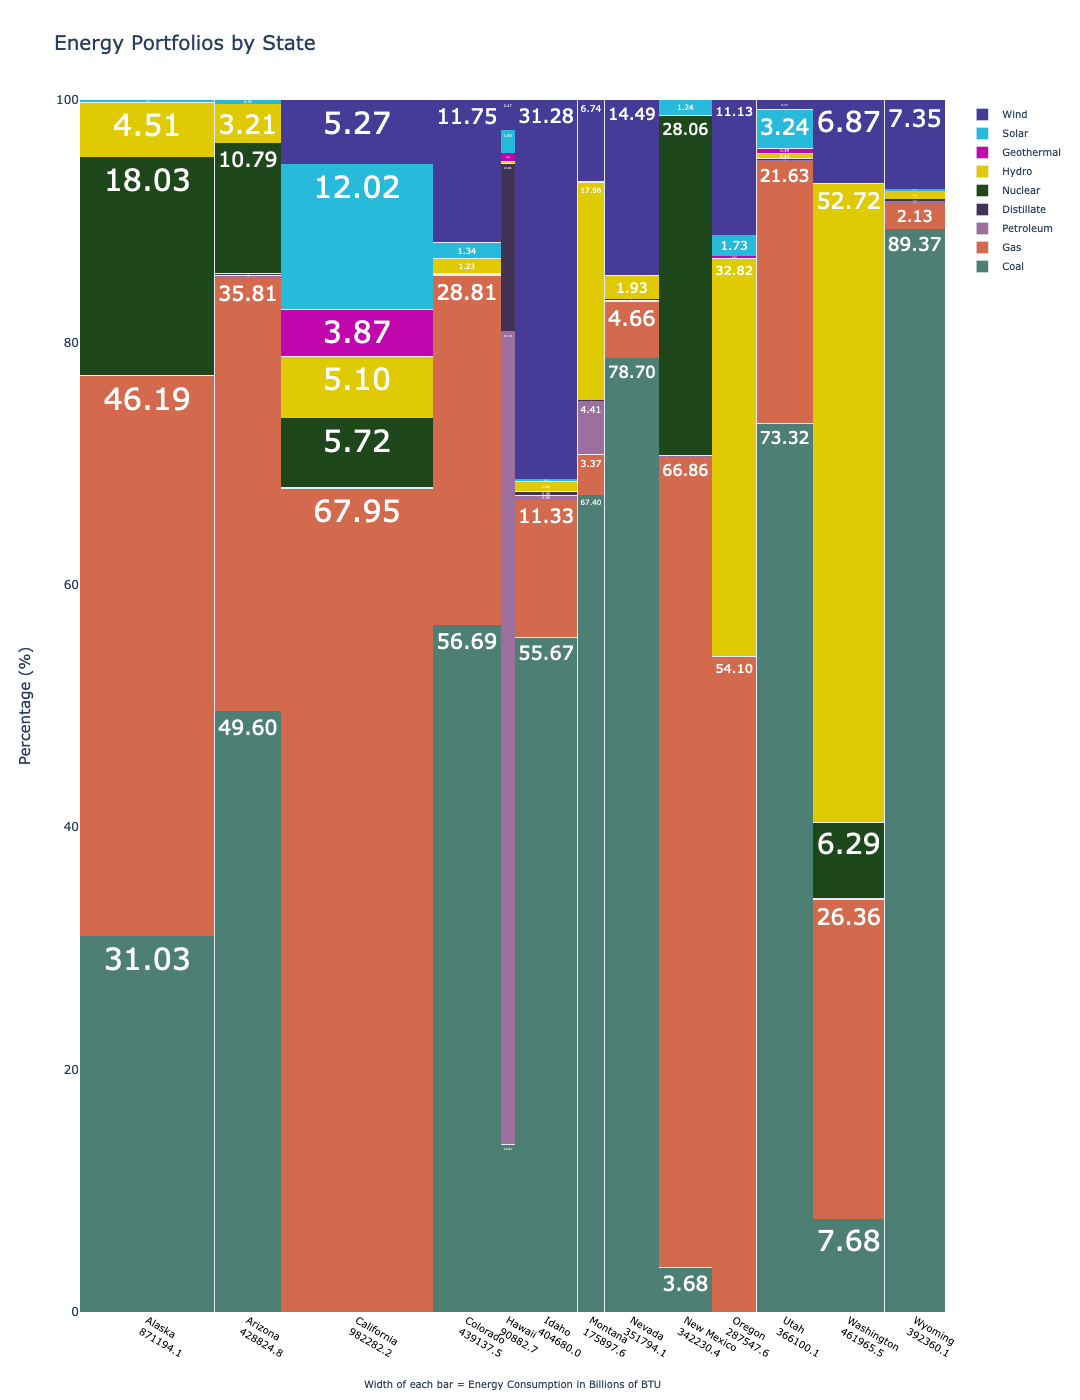

In [184]:
df_west,width_west,x_width_west,color_f = get_mekko_params(energy,'West')
make_mekko(df_west,width_west,x_width_west,color_f)

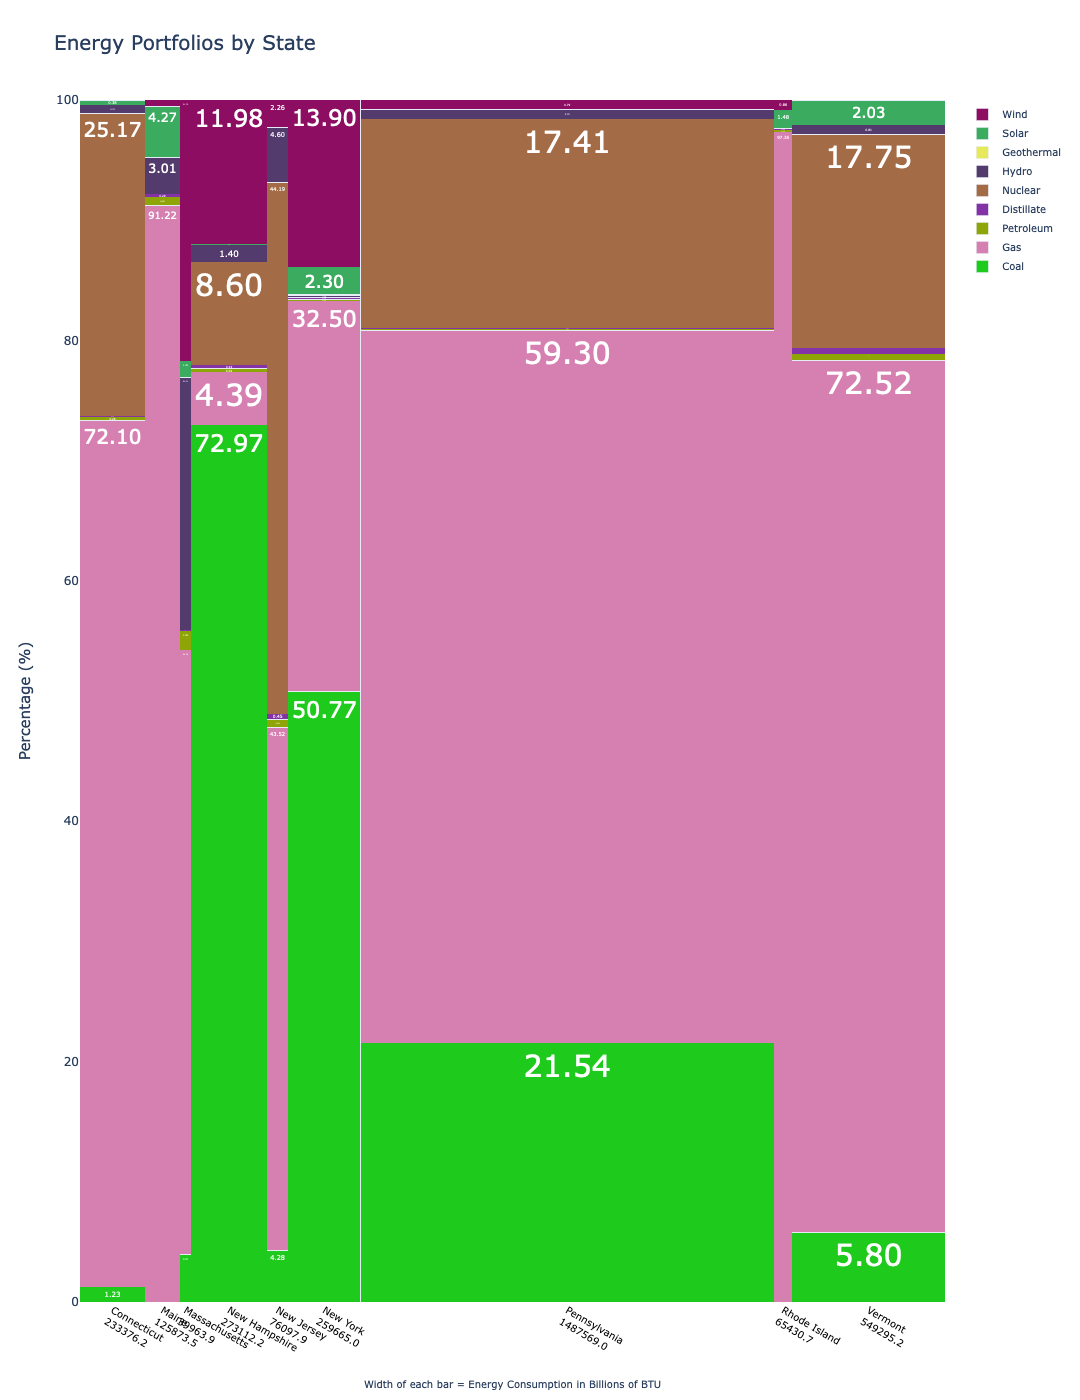

In [185]:
df_ne,width_ne,x_width_ne,color_ne = get_mekko_params(energy,'Northeast')
make_mekko(df_ne,width_ne,x_width_ne,color_ne)

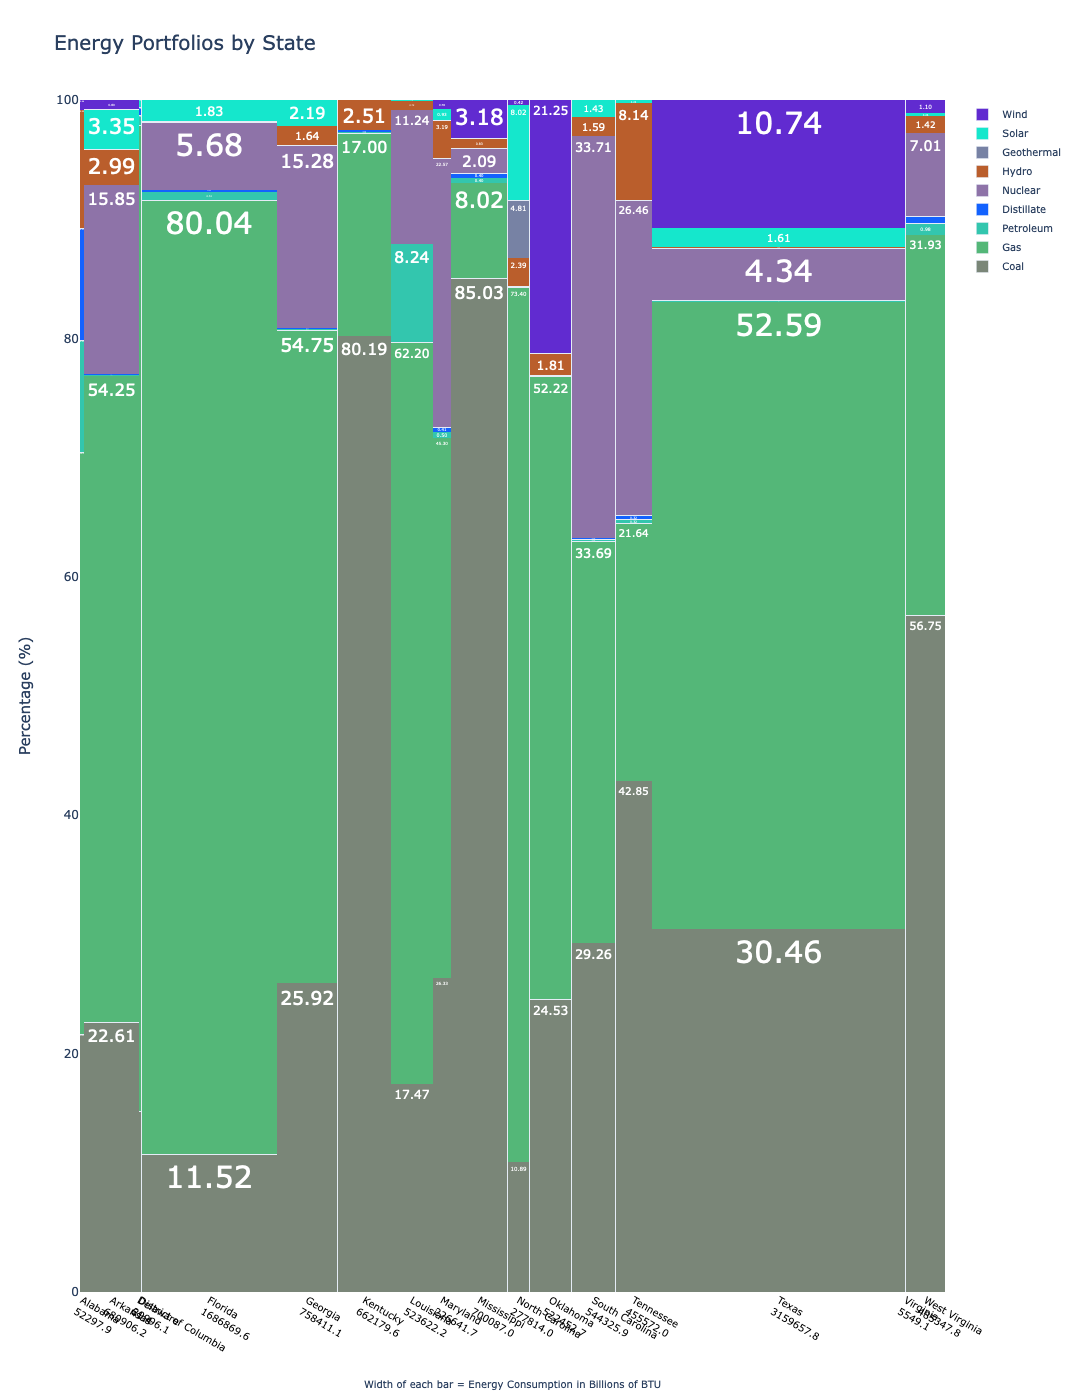

In [186]:
df_south,width_south,x_width_south,color_south = get_mekko_params(energy,'South')
make_mekko(df_south,width_south,x_width_south,color_south)

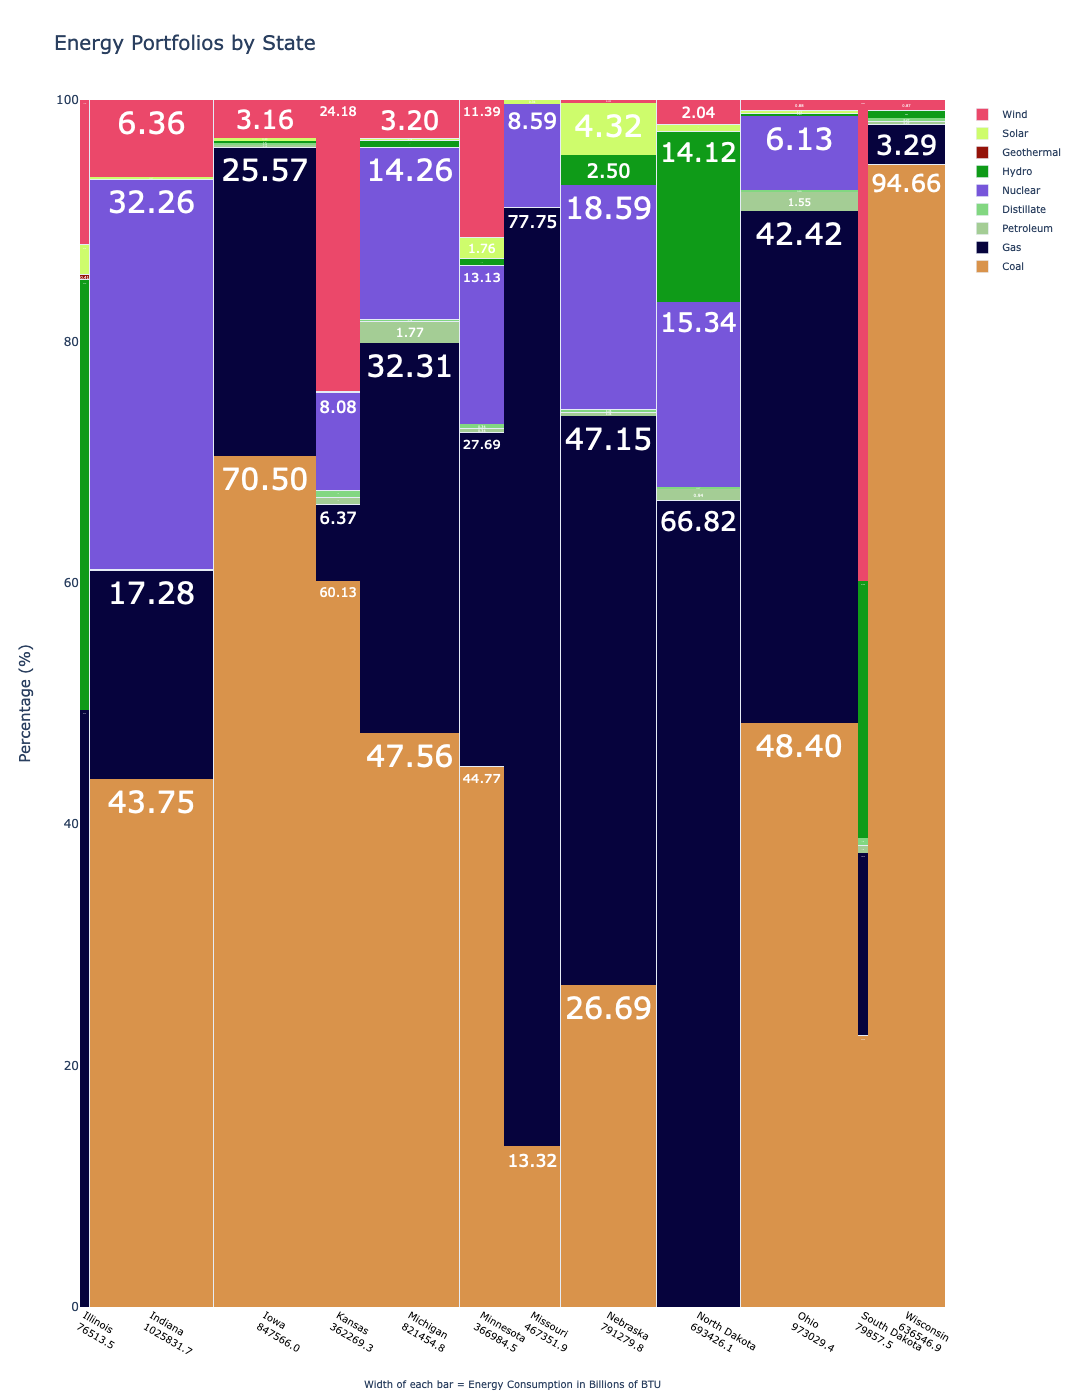

In [187]:
df_mw,width_mw,x_width_mw,color_mw = get_mekko_params(energy,'Midwest')
make_mekko(df_mw,width_mw,x_width_mw,color_mw)

In [188]:
energy.head()

,State,Coal,Gas,Petroleum,Distillate,Nuclear,Hydro,Geothermal,Solar,Wind,...,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,LSAD,ALAND,AWATER,geometry,Total
0,Alabama,1.130500e+13,2.551800e+13,4.919000e+12,4.919000e+12,0.000000e+00,5.186453e+12,0.000000e+00,0.000000e+00,4.504025e+11,...,01,01779775,0400000US01,01,AL,00,131174048583,4593327154,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...",5.229786e+13
1,Alaska,2.703100e+14,4.023840e+14,2.110000e+11,2.110000e+11,1.570813e+14,3.931126e+13,0.000000e+00,1.685597e+12,0.000000e+00,...,02,01785533,0400000US02,02,AK,00,1478839695958,245481577452,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ...",8.711941e+14
2,Arizona,2.126760e+14,1.535470e+14,5.490000e+11,5.490000e+11,4.625497e+13,1.374751e+13,0.000000e+00,1.501342e+12,0.000000e+00,...,04,01779777,0400000US04,04,AZ,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",4.288248e+14
3,Arkansas,1.539480e+14,3.693720e+14,4.930000e+11,4.930000e+11,1.079260e+14,2.038071e+13,0.000000e+00,2.283404e+13,5.459424e+12,...,05,00068085,0400000US05,05,AR,00,134768872727,2962859592,"POLYGON ((-94.61783 36.49941, -94.61765 36.499...",6.809062e+14
4,California,0.000000e+00,6.674810e+14,3.910000e+11,3.910000e+11,5.622183e+13,5.005268e+13,3.797029e+13,1.180293e+14,5.174510e+13,...,06,01779778,0400000US06,06,CA,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",9.822822e+14


<Axes: >

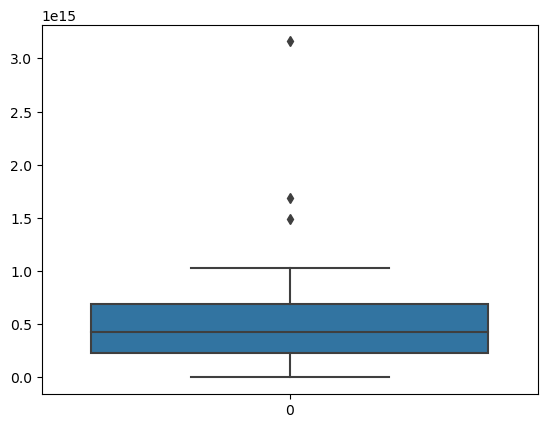

In [412]:
import seaborn as sns
sns.boxplot(energy.Total)

In [189]:
states = energy.iloc[:,0:9]
states.set_index('State',inplace=True)
states = states.transpose()

In [190]:
#Attempting to map pie chart of energy mix by state
#Link from choropie documentation https://github.com/vinceniko/choropie
#due to issues downloading, switching to cartopy
#to push to repo, git push -f origin main
states.head()

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Coal,1.130500e+13,2.703100e+14,2.126760e+14,1.539480e+14,0.000000e+00,2.489670e+14,2.880000e+12,0.0,4.542000e+12,1.942730e+14,...,1.795800e+13,1.952030e+14,9.624260e+14,2.684330e+14,3.183300e+13,0.000000e+00,3.546500e+13,2.754560e+14,6.025410e+14,3.506430e+14
Gas,2.551800e+13,4.023840e+14,1.535470e+14,3.693720e+14,6.674810e+14,1.265370e+14,1.682720e+14,0.0,2.481300e+13,1.350141e+15,...,1.208700e+13,9.858000e+13,1.661561e+15,7.919400e+13,3.983740e+14,8.000000e+09,1.217520e+14,1.549840e+14,2.094100e+13,8.349000e+12
Petroleum,4.919000e+12,2.110000e+11,5.490000e+11,4.930000e+11,3.910000e+11,3.790000e+11,6.630000e+11,0.0,2.450000e+11,1.254300e+13,...,4.890000e+11,1.465000e+12,2.318000e+12,3.940000e+11,3.089000e+12,3.400000e+10,1.280000e+11,4.749000e+12,1.735000e+12,6.180000e+11
Distillate,4.919000e+12,2.110000e+11,5.490000e+11,4.930000e+11,3.910000e+11,3.790000e+11,2.450000e+11,0.0,2.050000e+11,2.476000e+12,...,4.890000e+11,1.465000e+12,2.318000e+12,3.940000e+11,2.740000e+12,3.400000e+10,1.280000e+11,2.655000e+12,1.735000e+12,6.180000e+11
Nuclear,0.000000e+00,1.570813e+14,4.625497e+13,1.079260e+14,5.622183e+13,0.000000e+00,5.874681e+13,0.0,0.000000e+00,9.573782e+13,...,0.000000e+00,1.205509e+14,1.372056e+14,0.000000e+00,9.749166e+13,0.000000e+00,2.904072e+13,3.401904e+13,0.000000e+00,0.000000e+00


In [248]:
if not os.path.exists("images"):
    os.mkdir("images")

In [285]:
#store pie charts for every state's energy mix
pie_charts = []
for i in range(0,len(states.columns)):
    fig = px.pie(states, values=states.columns[i],names = states.index)
    fig.update_layout(title_text =str(states.columns[i]) + ' Energy Mix', title_yref = 'container',
                      title_font_size  = 20,
                      width = 500, height = 600)
    fig.write_image("images/"+str(states.columns[i])+"_energy_mix.png") #saving pie charts for each state
    pie_charts.append(fig)

In [286]:
p_charts = np.array(pie_charts).reshape(3,17)

In [324]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [325]:
list(states.iloc[:,0].values)

[11305000000000.0, 25518000000000.0, 4919000000000.0, 4919000000000.0, 0.0, 5186452800000.0, 0.0, 0.0]

In [376]:
spex=np.array([[{'type': 'domain'}]*27]).reshape(9,3).tolist()

In [377]:
spex

[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}], [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}], [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}], [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}], [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}], [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}], [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}], [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}], [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]]

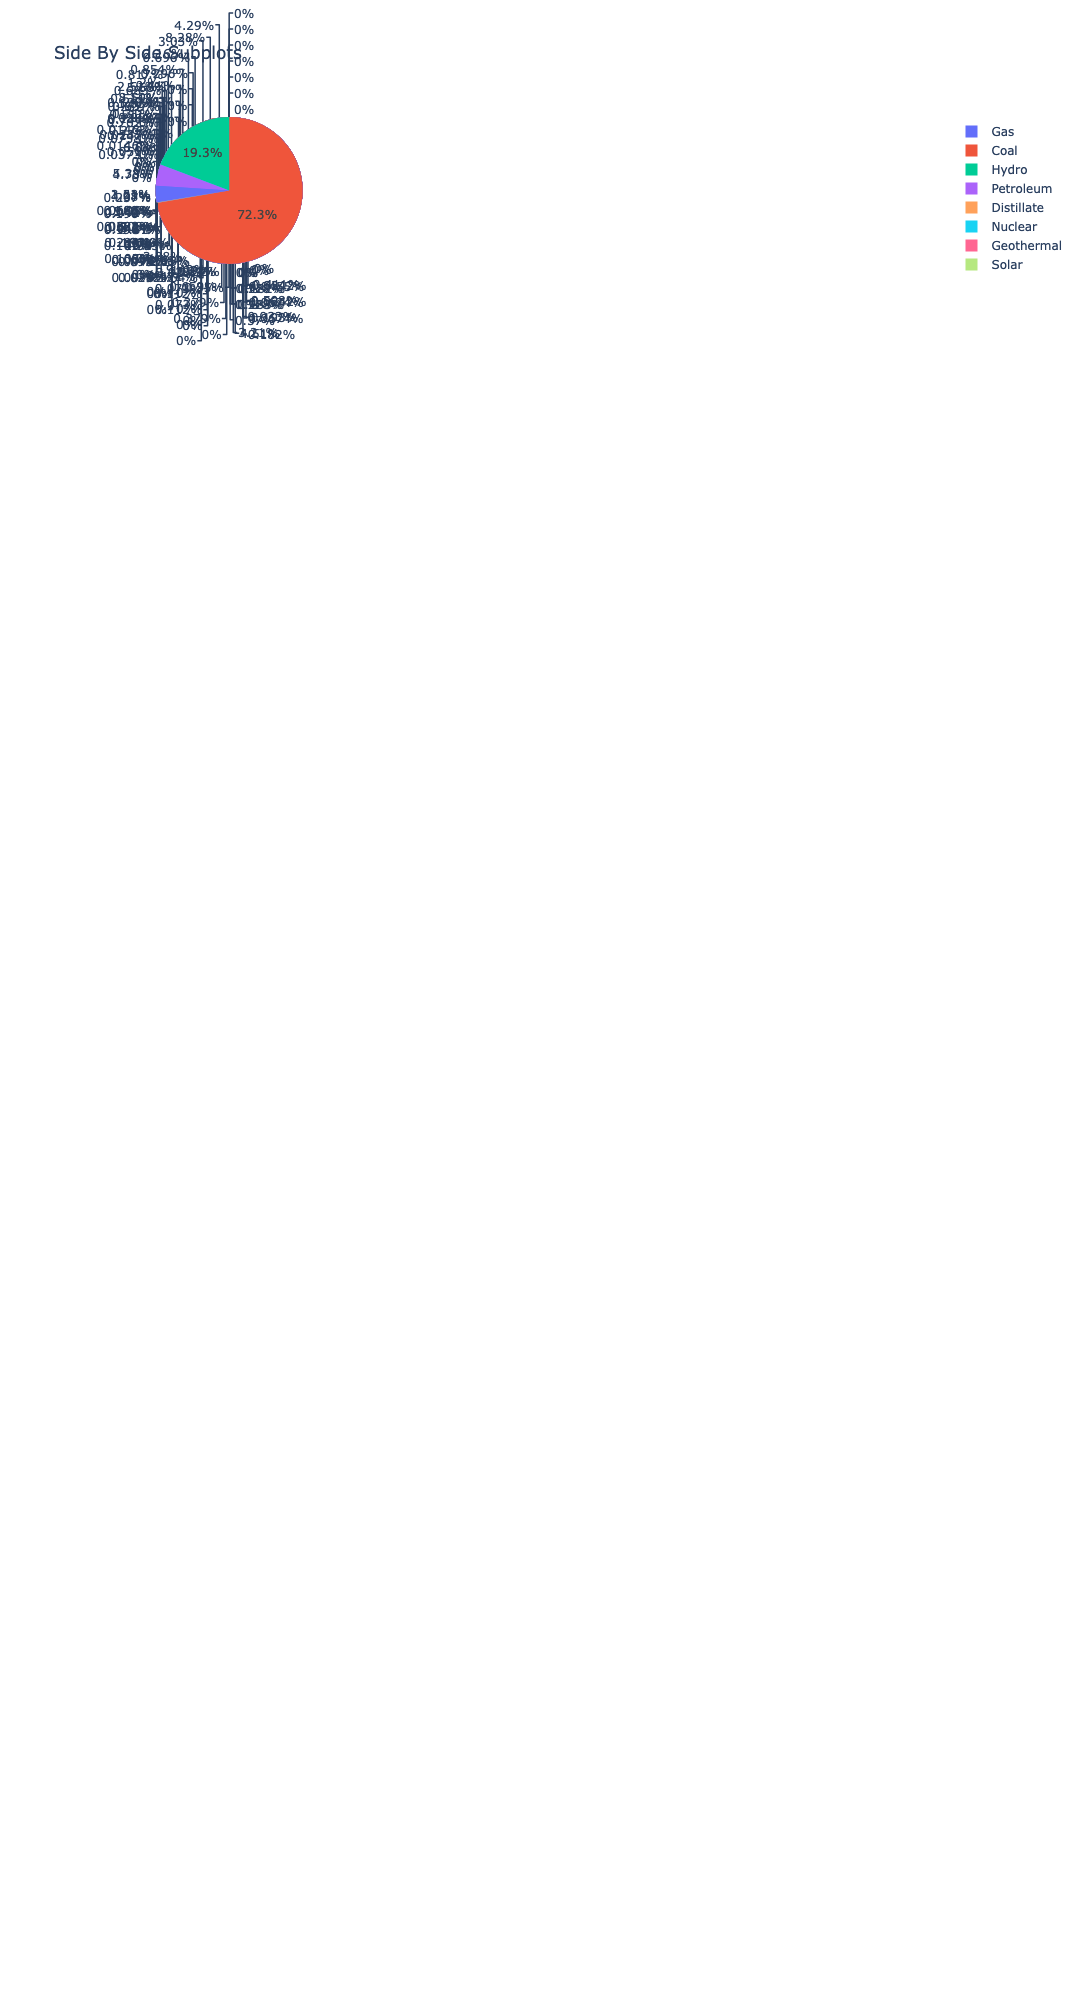

In [383]:
fig = make_subplots(rows=9, cols=3, specs = spex)
row_num = 1
col_num = 1
x_i = 0
y_i = 1/9
for i in range(0,27):
    fig.add_trace(go.Pie(values = list(states.iloc[:,i].values),labels = list(states.iloc[:,i].index),domain=dict(x=[x_i,y_i])), row = 1, col=1)
    if row_num <= 9:
        row_num += 1
        x_i += 1/9
        y_i += 1/9
        if x_i > 1:
            x_i = 1
        if y_i > 1:
            y_i = 1
    else:
        row_num = 0
        col_num += 1
        x_i = 0
        y_i = 1/9
fig.update_layout(height=2000, width=2000, title_text="Side By Side Subplots")
fig.show()

In [191]:
state_vars = energy.State.values
state_vars
#overlay pie charts at centroids for each state

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [194]:
#create centroids for every state
energy['centroid'] = energy.geometry.apply(lambda x: x.centroid)

In [193]:
energy['Pie Charts'] = pie_charts

In [195]:
energy.centroid.head()

0    POINT (-86.82836708688333 32.78982605285617)
1    POINT (-152.2211078250468 64.21762573223204)
2    POINT (-111.6644073327168 34.29310461672168)
3     POINT (-92.43926114251899 34.8997389966697)
4    POINT (-119.6106958476626 37.24607274643385)
Name: centroid, dtype: object

In [196]:
kansas_center = energy[energy.State == 'Kansas'].centroid
print(type(kansas_center.values[0].x))

<class 'numpy.float64'>


In [197]:
energy.columns

Index(['State', 'Coal', 'Gas', 'Petroleum', 'Distillate', 'Nuclear', 'Hydro',
       'Geothermal', 'Solar', 'Wind', 'State Code', 'Region', 'Division',
       'STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'LSAD', 'ALAND',
       'AWATER', 'geometry', 'Total', 'Pie Charts', 'centroid'],
      dtype='object')

In [198]:
long = [pt.x for pt in energy.centroid]
lati = [pt.y for pt in energy.centroid]

In [210]:
energy['lat'] = lati
energy['lot'] = long

In [228]:
def plot_pie(i,ax, r=1): 
    # radius for pieplot size on a scatterplot
    ax.pie(i[1:9], center=(i[-1],i[-2]), radius=r)
    
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
ax = axs
# do not use `s=` for size, it will not work properly when you are scattering pieplots
# because pieplots will be plotted above them
ax.scatter(x=lati, y=long, s=0)
# git min/max values for the axes
y_init = ax.get_ylim()
x_init = ax.get_xlim()
energy.apply(lambda x : plot_pie(x,ax,r=1), axis=1)
# from zero to xlim/ylim with step 10
#_ = ax.yaxis.set_ticks(range(0, round(y_init[1])+10, 10))
#_ = ax.xaxis.set_ticks(range(0, round(x_init[1])+10, 10))
ax.set_frame_on(True)
plt.show()

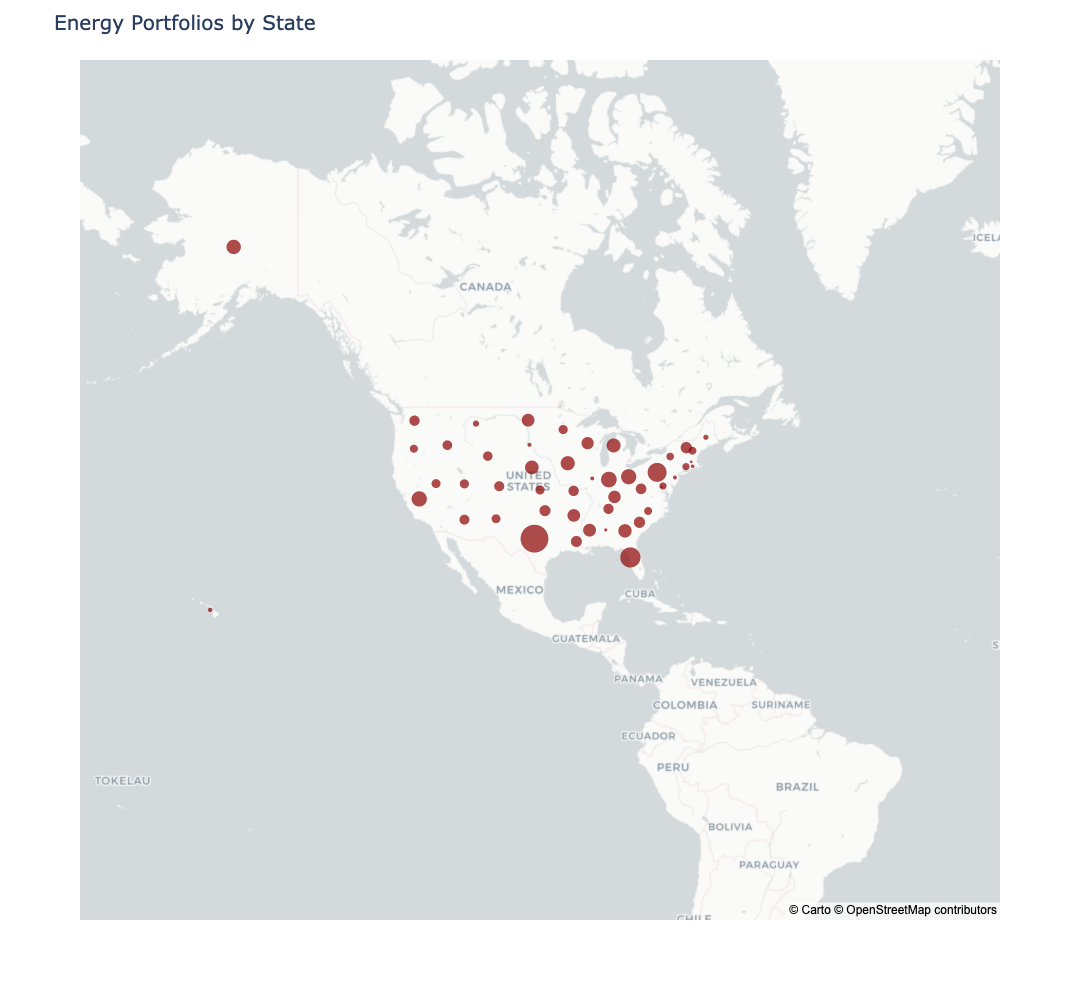

In [205]:
fig = px.scatter_mapbox(lon = long, lat = lati,
                  zoom=2,
                  center={'lon': kansas_center.values[0].x, 'lat': kansas_center.values[0].y},
                  size=energy.Total,color_discrete_sequence=['darkred'],
                  mapbox_style='carto-positron')

fig.update_layout(title_text ="Energy Portfolios by State",
                      barmode = "stack",
                      title_font_size  = 20,
                      width = 1000, height = 1000)

In [389]:
energy['Rank'] = energy.Total.rank()

In [392]:
energy[energy.State == 'District of Columbia']

,State,Coal,Gas,Petroleum,Distillate,Nuclear,Hydro,Geothermal,Solar,Wind,...,LSAD,ALAND,AWATER,geometry,Total,Pie Charts,centroid,lat,lot,Rank
8,District of Columbia,4.542000e+12,2.481300e+13,2.450000e+11,2.050000e+11,0.0,0.0,0.0,1.910798e+11,0.0,...,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",2.999608e+13,"Figure({\n 'data': [{'domain': {'x': [0.0, ...",POINT (-77.01629383836658 38.90473393549873),38.904734,-77.016294,3.0


<h3>Instructions from Call:</h3>
Imagine that we have a map of the united states, but instead of having individual states, we do pie charts --> and the pie charts are for the generation mix, and we have whatever size wedge depending on coal nuclear wind, and we make the size of the pie linked to the quantity of electricity that they generate in the state
and it's important that we use generation
- Use a marimekko chart to identify the differences

Have arrows that go from one pie chart to another to see how one pie chart to another --
Hawaii and Alaska off to the side without any arrows, not all states are going to have arrows that go to the other 47
- 
plotly height

Only focusing on electricity that's getting transmitted along state lines

Just take the most recent year that they have
Query the SEDS API

Have 3 charts
- One map is how much electricty does each state produce
- What is the generation mix per state
- How much is going in and out

Don't have each map representing of the state, have boxes distributed into a map, bc obviously its not gonna be the easiest thing to put a number
- Map might not be the best idea, could also 

Can also have dark red if they're bringing in a lot of electricity, and dark blue if they're sending out a lot
Do we want to compare absolute quantities that they send in and out or what share of total generation
- i.e. California possesses the largest share, but do they possess the largest absolute amount

Quantity generated --> you have a number but you have 5 different shades of different thresholds that look like appropriate thresholds when you eyeball the data --> heatmap